# Data Loading and Exploration

   Study Hours  Attendance  Pass
0           38          88     1
1           28          61     1
2           14          96     0
3            7           0     0
4           20          26     0

Missing Values:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64

Dataset Statistics:
        Study Hours  Attendance        Pass
count   150.000000  150.000000  150.000000
mean     20.033333   49.506667    0.293333
std      11.882205   31.062774    0.456815
min       0.000000    0.000000    0.000000
25%      10.000000   22.250000    0.000000
50%      21.000000   51.000000    0.000000
75%      29.000000   75.500000    1.000000
max      40.000000  100.000000    1.000000


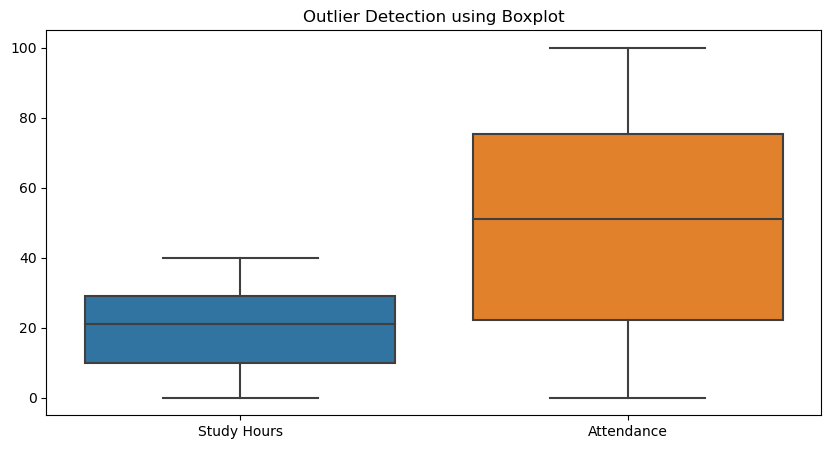

In [1]:
#import all neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv(r"C:\Users\SREE HARSHA\OneDrive\Documents\OneDrive\Desktop\Internship\Main Flow\study_performance.csv")

# Display first 5 rows
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check basic statistics
print("\nDataset Statistics:\n", df.describe())

# Check for outliers using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Study Hours', 'Attendance']])
plt.title("Outlier Detection using Boxplot")
plt.show()

# Data Visualization

C:\Users\SREE HARSHA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


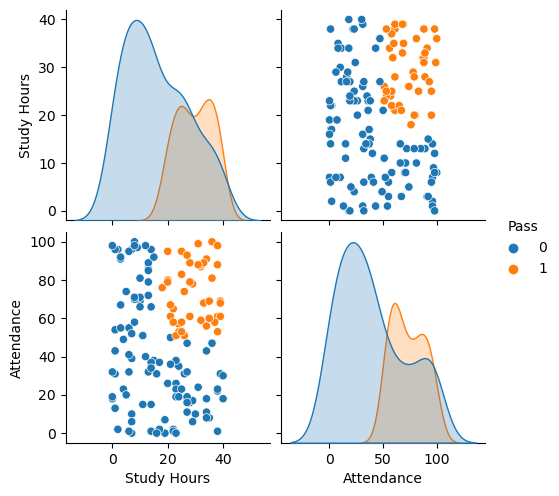

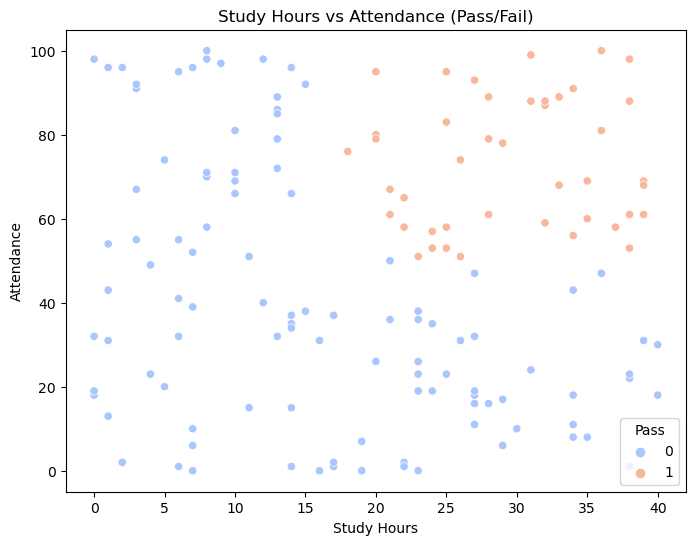

In [2]:
# Pairplot to visualize relationships
sns.pairplot(df, hue="Pass", diag_kind="kde")
plt.show()

# Scatter plot: Study Hours vs. Attendance
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Study Hours"], y=df["Attendance"], hue=df["Pass"], palette="coolwarm")
plt.title("Study Hours vs Attendance (Pass/Fail)")
plt.xlabel("Study Hours")
plt.ylabel("Attendance")
plt.show()

# Model Training

In [3]:
# Define features and target variable
X = df[['Study Hours', 'Attendance']]  # Independent Variables
y = df['Pass']  # Target Variable

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but improves model performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

# Model Evaluation

Model Accuracy: 0.80

Confusion Matrix:
 [[16  1]
 [ 5  8]]


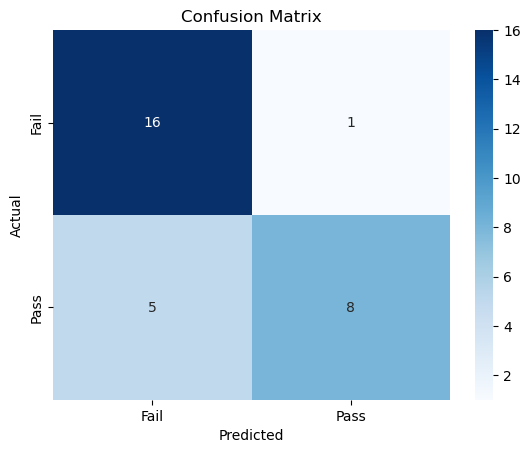


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84        17
           1       0.89      0.62      0.73        13

    accuracy                           0.80        30
   macro avg       0.83      0.78      0.78        30
weighted avg       0.82      0.80      0.79        30



In [4]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualization of Confusion Matrix
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Insights & Interpretation

Key Predictors of Student Performance:

Students with higher study hours and higher attendance tend to pass.

Attendance has a significant impact on passing rates.

Confusion Matrix Interpretation:

True Positives (TP): Students who actually passed and were correctly predicted as "Pass".

True Negatives (TN): Students who actually failed and were correctly predicted as "Fail".

False Positives (FP): Students predicted as "Pass" but actually failed.

False Negatives (FN): Students predicted as "Fail" but actually passed.

Accuracy & Model Performance:

The accuracy score tells us how well the model is performing.

A high True Positive Rate (TPR) indicates that the model is effectively predicting students who will pass.

# Conclusion

The logistic regression model helps predict whether a student will pass based on study hours and attendance.

The confusion matrix provides insights into misclassifications.

This model can be used by educators to identify students who may need extra support.